# TUGAS BESAR STATISTIKA SAINS DATA
# ANALISIS VIDEO TRENDING YOUTUBE

In [64]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#melakukan pemanggilan data
df= pd.read_csv('USvideos.csv')
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [66]:
# melihat data yang unik
''' disini kita memeriksa setiap kolom yang memilliki data yang unik dengan melakukan syntax perulangan for dari kolom,'''
for i in range (len(df.columns)):
    print ("data yang unik", df.columns[i], 'ada sebanyak', len(df.iloc[:,1].unique()))

data yang unik video_id ada sebanyak 205
data yang unik trending_date ada sebanyak 205
data yang unik title ada sebanyak 205
data yang unik channel_title ada sebanyak 205
data yang unik category_id ada sebanyak 205
data yang unik publish_time ada sebanyak 205
data yang unik tags ada sebanyak 205
data yang unik views ada sebanyak 205
data yang unik likes ada sebanyak 205
data yang unik dislikes ada sebanyak 205
data yang unik comment_count ada sebanyak 205
data yang unik thumbnail_link ada sebanyak 205
data yang unik comments_disabled ada sebanyak 205
data yang unik ratings_disabled ada sebanyak 205
data yang unik video_error_or_removed ada sebanyak 205
data yang unik description ada sebanyak 205


In [67]:
df.info() # menampilkan informasi data
''' dari sini dapat kita lihat bahwa terdapat 16 kolom dan terdapat 4 jenis type data
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

' dari sini dapat kita lihat bahwa terdapat 16 kolom dan terdapat 4 jenis type data\n'

## 1. Data Wrangling
### 1.1 Lakukan data wrangling untuk menemukan informasi

In [68]:
# mengubah tipe data publish time dan trendig date menjadi time series
df['publish_time']= pd.to_datetime(df['publish_time'])
df['trending_date']= pd.to_datetime(df['trending_date'], format = "%y.%d.%m")
''' mengubah type data pada kolom publish time dan trending time menjadi date time'''

' mengubah type data pada kolom publish time dan trending time menjadi date time'

In [69]:
# slicing data yang di butuhkan
df2=df[['likes', 'dislikes', 'views', 'comment_count','video_error_or_removed','comments_disabled', 'channel_title', 'publish_time','trending_date']]
df2

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date
0,57527,2966,748374,15954,False,False,CaseyNeistat,2017-11-13 17:13:01+00:00,2017-11-14
1,97185,6146,2418783,12703,False,False,LastWeekTonight,2017-11-13 07:30:00+00:00,2017-11-14
2,146033,5339,3191434,8181,False,False,Rudy Mancuso,2017-11-12 19:05:24+00:00,2017-11-14
3,10172,666,343168,2146,False,False,Good Mythical Morning,2017-11-13 11:00:04+00:00,2017-11-14
4,132235,1989,2095731,17518,False,False,nigahiga,2017-11-12 18:01:41+00:00,2017-11-14
...,...,...,...,...,...,...,...,...,...
40944,38160,1385,1685609,2657,False,False,AaronsAnimals,2018-05-18 13:00:04+00:00,2018-06-14
40945,60008,382,1064798,3936,False,False,zefrank1,2018-05-18 01:00:06+00:00,2018-06-14
40946,48068,1032,1066451,3992,False,False,Brad Mondo,2018-05-18 17:34:22+00:00,2018-06-14
40947,192957,2846,5660813,13088,False,False,How It Should Have Ended,2018-05-17 17:00:04+00:00,2018-06-14


In [70]:
# Statistika sederhana dari data
df2.describe()

,likes,dislikes,views,comment_count
count,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,7.426670e+04,3.711401e+03,2.360785e+06,8.446804e+03
std,2.288853e+05,2.902971e+04,7.394114e+06,3.743049e+04
min,0.000000e+00,0.000000e+00,5.490000e+02,0.000000e+00
25%,5.424000e+03,2.020000e+02,2.423290e+05,6.140000e+02
50%,1.809100e+04,6.310000e+02,6.818610e+05,1.856000e+03
75%,5.541700e+04,1.938000e+03,1.823157e+06,5.755000e+03
max,5.613827e+06,1.674420e+06,2.252119e+08,1.361580e+06


In [71]:
#Ambil data video dengan jumlah dislike lebih dari 10 persen jumlah like 
df2.query('dislikes  > 0.1 * likes')

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date
6,15993,2445,2103417,1970,False,False,Saturday Night Live,2017-11-12 05:37:17+00:00,2017-11-14
9,12654,1363,256426,2368,False,False,Vox,2017-11-13 13:45:16+00:00,2017-11-14
11,1576,303,104578,1279,False,False,amc,2017-11-13 03:00:00+00:00,2017-11-14
13,7848,1171,544770,3981,False,False,NowThis World,2017-11-12 14:00:00+00:00,2017-11-14
23,1707,578,145921,673,False,False,Refinery29,2017-11-12 16:00:01+00:00,2017-11-14
...,...,...,...,...,...,...,...,...,...
40919,7840,1333,324219,1257,False,False,DidYouKnowGaming?,2018-05-24 19:00:24+00:00,2018-06-14
40923,33243,4899,5985284,16703,False,False,camelsandfriends,2018-05-23 13:33:03+00:00,2018-06-14
40930,19895,2831,2003345,3481,False,False,American Idol,2018-05-22 04:08:24+00:00,2018-06-14
40934,66559,14179,8607264,8382,False,False,Saturday Night Live,2018-05-20 04:58:51+00:00,2018-06-14


In [72]:
jml_like= df2.query('dislikes  > 0.1 * likes')

In [73]:
# bandingkan ratio like dan dislike nya kemudian urutkan berdasarkan ratio terbesar
df3 = jml_like.assign(ratio = jml_like['likes'] / (df['likes'] + jml_like['dislikes']))
df3 = df3.sort_values('ratio',ascending=False)
df3

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date,ratio
5479,16459,1646,1976593,3359,False,False,Pokémon GO,2017-12-06 13:59:34+00:00,2017-12-11,0.909086
32739,30525,3053,1224885,4681,False,False,itsAlexClark,2018-04-18 22:00:00+00:00,2018-05-04,0.909077
1722,17001,1701,1932429,1700,False,False,Sam Chui,2017-11-17 13:01:28+00:00,2017-11-22,0.909047
36805,104558,10462,2977102,5588,False,False,Hannah Stocking,2018-05-19 16:30:09+00:00,2018-05-25,0.909042
21803,15475,1549,690712,3734,False,False,Gibi ASMR,2018-03-01 23:10:11+00:00,2018-03-05,0.909011
...,...,...,...,...,...,...,...,...,...,...
7594,9572,228426,1205682,29634,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-21,0.040219
7357,9368,224152,1179072,29063,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-20,0.040116
7116,9100,218841,1142585,28013,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-19,0.039923
1490,0,2,2197,0,False,False,Rob Andretti,2017-10-28 11:15:14+00:00,2017-11-21,0.000000


In [74]:
# Temukan video yang memiliki likes = 0 ! berapakah views maksimum nya ?
likes_0= df.query('likes == 0')
'''menentukan likes video = 0 denngan car slicing kolom likess == 0'''

In [75]:
likes_0[ ['views','likes','dislikes'] ].describe() 
''' menampilakn keseluruhan staistika sederhana  yang memilki likes =0'''

,views,likes,dislikes
count,1.720000e+02,172.0,172.000000
mean,4.052518e+06,0.0,0.029070
std,1.135538e+07,0.0,0.274178
min,1.456000e+03,0.0,0.000000
25%,7.713425e+04,0.0,0.000000
50%,4.290240e+05,0.0,0.000000
75%,1.012722e+06,0.0,0.000000
max,5.611196e+07,0.0,3.000000


In [76]:
#sorting data dengan ratio tertinggi
df3 = df3.sort_values('ratio',ascending=False)
df3

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date,ratio
5479,16459,1646,1976593,3359,False,False,Pokémon GO,2017-12-06 13:59:34+00:00,2017-12-11,0.909086
32739,30525,3053,1224885,4681,False,False,itsAlexClark,2018-04-18 22:00:00+00:00,2018-05-04,0.909077
1722,17001,1701,1932429,1700,False,False,Sam Chui,2017-11-17 13:01:28+00:00,2017-11-22,0.909047
36805,104558,10462,2977102,5588,False,False,Hannah Stocking,2018-05-19 16:30:09+00:00,2018-05-25,0.909042
21803,15475,1549,690712,3734,False,False,Gibi ASMR,2018-03-01 23:10:11+00:00,2018-03-05,0.909011
...,...,...,...,...,...,...,...,...,...,...
7594,9572,228426,1205682,29634,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-21,0.040219
7357,9368,224152,1179072,29063,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-20,0.040116
7116,9100,218841,1142585,28013,False,False,Daily Caller,2017-12-13 22:52:57+00:00,2017-12-19,0.039923
1490,0,2,2197,0,False,False,Rob Andretti,2017-10-28 11:15:14+00:00,2017-11-21,0.000000


In [77]:
#pengelompokan data berdasarkan hari di publish
df['publish_time'].apply(lambda x: x.strftime('%A')).value_counts().to_frame().reset_index()

,index,publish_time
0,Friday,7002
1,Thursday,6950
2,Tuesday,6786
3,Wednesday,6762
4,Monday,6177
5,Sunday,3679
6,Saturday,3593


In [78]:
#pengelompokan data berdasarkan bulan trending
trending = df.groupby([(df.trending_date.dt.year), (df.trending_date.dt.month)]).sum()
trending
''' pada cell ini akan di tampilkan video trending berdasarkan bulan dan tahun'''

' pada cell ini akan di tampilkan video trending berdasarkan bulan dan tahun'

In [79]:
#deskripsi data yang terbesar dari semua kolom yangber typnumeric 
df3.max(numeric_only= True)

likes                       3093544
dislikes                    1674420
views                     149376127
comment_count               1361580
video_error_or_removed         True
comments_disabled              True
ratio                      0.909086
dtype: object

In [80]:
#deskripsi data yang terkecil 
df2.min(numeric_only= True)

likes                         0
dislikes                      0
views                       549
comment_count                 0
video_error_or_removed    False
comments_disabled         False
dtype: object

In [81]:
# pengelompokan berdasarkan komentar di aktifkan dan dinonaktifkan
kgl= df.groupby('comments_disabled').sum()
kgl

,category_id,views,likes,dislikes,comment_count,ratings_disabled,video_error_or_removed
comments_disabled,,,,,,,
False,803337,95077405650,3027572377,150278665,345888164,63,23
True,14514,1594364502,13574821,1699490,0,106,0


In [82]:
#pengelompokan berdasarkan video yang di hapus atau tidak
kgl1= df.groupby('video_error_or_removed').sum()
kgl1

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
video_error_or_removed,,,,,,,
False,817612,96633657080,3040025478,151944975,345829160,633,169
True,239,38113072,1121720,33180,59004,0,0


In [83]:
# jumlah dislikes terbanyak
df2.loc[df2['dislikes'] == df2['dislikes'].max()]

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date
11323,1402578,1674420,37539570,1361580,False,False,Logan Paul Vlogs,2018-01-02 16:42:21+00:00,2018-01-09


In [84]:
#jumlah like terbanyak
df2.loc[df2['likes'] == df2['likes'].max()]

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date
38273,5613827,206892,123010920,1228655,False,False,ibighit,2018-05-18 09:00:02+00:00,2018-06-01


In [85]:
#jumlah views terbanyak
df2.loc[df2['views'] == df2['views'].max()]

,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date
38547,5023450,343541,225211923,517232,False,False,ChildishGambinoVEVO,2018-05-06 04:00:07+00:00,2018-06-02


In [86]:
# ratio rata-rata jumlah likes/dislikes untuk video dengan komentar yang dinonaktifkan ?
df3 = df2.query('comments_disabled==True')
df4 = df3.assign( ratio = df3['likes'] / (df3['likes'] + df3['dislikes']))
df4


,likes,dislikes,views,comment_count,video_error_or_removed,comments_disabled,channel_title,publish_time,trending_date,ratio
31,119,69,26000,0,False,True,Amazon.co.uk,2017-11-06 17:52:50+00:00,2017-11-14,0.632979
103,3283,853,264793,0,False,True,H&M,2017-11-09 08:01:40+00:00,2017-11-14,0.793762
290,217,177,94229,0,False,True,Amazon.co.uk,2017-11-06 17:52:50+00:00,2017-11-15,0.550761
372,3330,854,271685,0,False,True,H&M,2017-11-09 08:01:40+00:00,2017-11-15,0.795889
483,127,13,11769,0,False,True,Summit,2017-11-14 17:37:20+00:00,2017-11-16,0.907143
...,...,...,...,...,...,...,...,...,...,...
40549,61841,3708,3238183,0,False,True,Nintendo,2018-06-13 01:18:57+00:00,2018-06-13,0.943432
40624,79182,31697,8903674,0,False,True,Apple,2018-06-04 04:00:00+00:00,2018-06-13,0.714130
40631,53192,4312,4642895,0,False,True,Britain's Got Talent,2018-06-03 21:11:48+00:00,2018-06-13,0.925014
40832,79282,31716,8916546,0,False,True,Apple,2018-06-04 04:00:00+00:00,2018-06-14,0.714265


In [87]:
# ratio rata-rata jumlah comments/views untuk video dengan ratings yang dinonaktifkan ?
df5 = df.query('ratings_disabled==True')
df5 = df5.assign( ratio = df2['comment_count'] / (df2['views'] + df2['comment_count']) )
df5

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,ratio
1435,Kn5UgGQukYQ,2017-11-21,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0.000000e+00
1667,Kn5UgGQukYQ,2017-11-22,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0.000000e+00
1868,_akwfRuL4os,2017-11-23,Highlights of the EA predatory behavior announ...,chris lee,22,2017-11-21 19:29:03+00:00,[none],160012,0,0,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,1.064711e-02
1914,Kn5UgGQukYQ,2017-11-23,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,0.000000e+00
2081,_akwfRuL4os,2017-11-24,Highlights of the EA predatory behavior announ...,Chris Lee,22,2017-11-21 19:29:03+00:00,[none],179448,0,0,1847,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,1.018782e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,UwbO_xb1-Xo,2018-04-05,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",0.000000e+00
28346,UwbO_xb1-Xo,2018-04-06,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",0.000000e+00
28550,9TUBf6l7FBg,2018-04-14,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05 06:48:28+00:00,[none],3598220,0,0,0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,0.000000e+00
28751,9TUBf6l7FBg,2018-04-15,Coachella 2018 LIVE Channel 1,Coachella,10,2018-04-05 06:48:28+00:00,[none],11137071,0,0,2,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,1.795804e-07


In [88]:
r1 = df5['ratio'].mean()

In [89]:
print(r1, 1-r1)


0.0018133621624128007 0.9981866378375872


## 2. Data Visualization
### 2.1 Lakukan data wrangling kemudian visualisasikan data berikut sesuai dengan penyajian data yang tepat

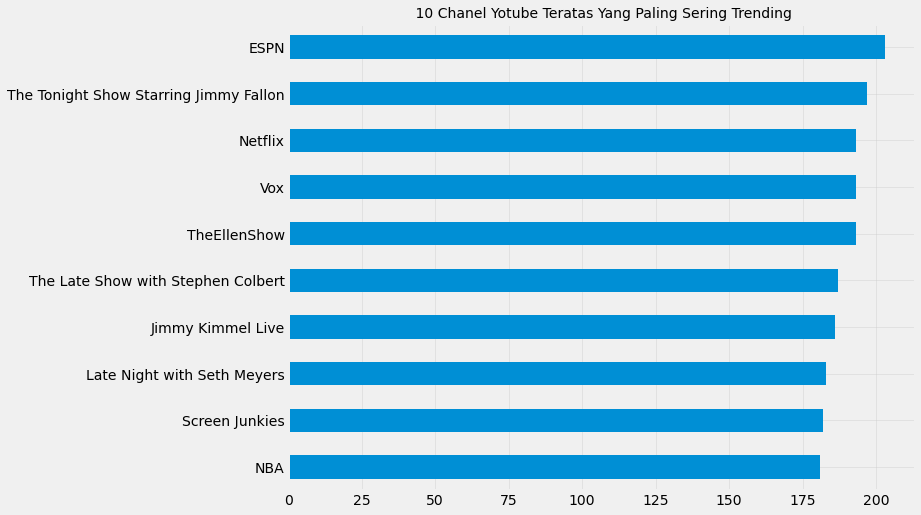

' pada cell ini akan di tampilkan 10 chanel youtube yang paling mengalami trending'

In [90]:
df2['channel_title'].value_counts().head(10).sort_values().plot(kind = 'barh', figsize=(10,8))
plt.title(" 10 Chanel Yotube Teratas Yang Paling Sering Trending", size=(14))
plt.grid(alpha=0.4)
plt.show()

''' pada cell ini akan di tampilkan 10 chanel youtube yang paling mengalami trending'''

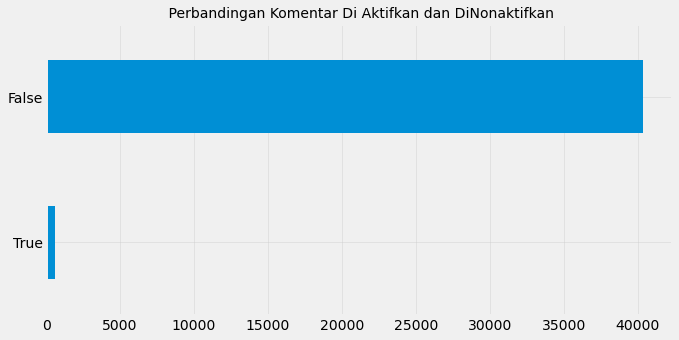

In [91]:
# perbandingan video  yang di aktifkan dan di nonaktifkan
df2['comments_disabled'].value_counts().head(10).sort_values().plot(kind = 'barh', figsize=(10,5))
plt.title(" Perbandingan Komentar Di Aktifkan dan DiNonaktifkan", size=(14))
plt.grid(alpha=0.4)
plt.show()

''' pada ploting ini akan menampilkan perbandingan video trending yang komentar di aktifkan atau tidak, setelh dilakuakan
ploting terlihat jelas bahwa video yang mengalami trending terbanyak adalah video yang mengaktifkan komentar'''

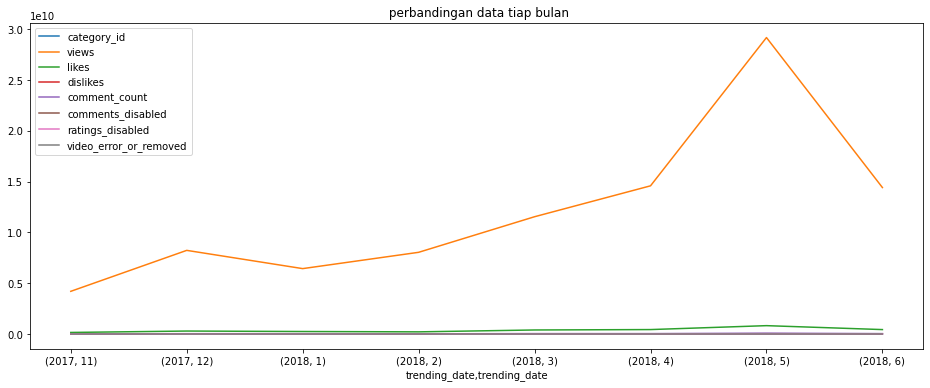

In [39]:
# perbandingan data tiap bulannya
trending.plot(kind = 'line', figsize= (16,6), title = " perbandingan data tiap bulan");

''' dari hasil ploting dihasilkan bahwa yang mengalami kategori yang mengalami jumlalh terbanyak adalah views, dari sini
dapat kita simpulkan bahwa orang yang menggunakan youtube lebih dominan hanya menonton tanpa memberi like'''

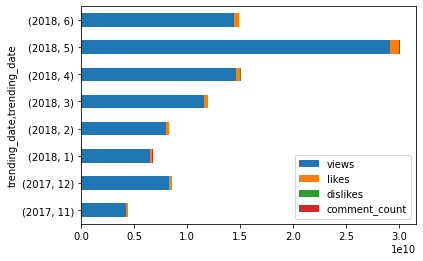

In [40]:
# perbandingan data likes, dislikes, views dan comment_count
trending.plot(kind = 'barh', stacked= True, y=['views',"likes", 'dislikes', 'comment_count']);

''' dari disini juga dapat kita simpulkan bahwa views  lebih mendominasi dari kategori yang lainnya, yang menyatakan bahawa
pengguna youtube lebih dominan hanya menonton saja tanpa meninggalkan jejak'''

# 3.Data Processing

In [41]:
# data Processing
dts = {
'views': df['views'],
'likes': df['likes'],
'dislikes':df['dislikes'],
'comment':df['comment_count'],
'trending_date':df['trending_date'],   
'comments_disabled':df['comments_disabled'],
'channel_title':df['channel_title']
}

df_new = pd.DataFrame(data = dts)
df_new.head(10)

,views,likes,dislikes,comment,trending_date,comments_disabled,channel_title
0,748374,57527,2966,15954,2017-11-14,False,CaseyNeistat
1,2418783,97185,6146,12703,2017-11-14,False,LastWeekTonight
2,3191434,146033,5339,8181,2017-11-14,False,Rudy Mancuso
3,343168,10172,666,2146,2017-11-14,False,Good Mythical Morning
4,2095731,132235,1989,17518,2017-11-14,False,nigahiga
5,119180,9763,511,1434,2017-11-14,False,iJustine
6,2103417,15993,2445,1970,2017-11-14,False,Saturday Night Live
7,817732,23663,778,3432,2017-11-14,False,CrazyRussianHacker
8,826059,3543,119,340,2017-11-14,False,20th Century Fox
9,256426,12654,1363,2368,2017-11-14,False,Vox


# 4. Model Implementation
## 4.1 Aplikasi Linear Discriminant Analysis (LDA)

In [42]:
# import data yang di butuhkan untuk anallisis model LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import style
import seaborn as sns
np.set_printoptions(precision=4)
style.use('fivethirtyeight')

In [43]:
# import data, yang saya gunakan adalah data hasil processing tadi 
# dan sini saya memanggil 5 baris datanya
df_new.head(5)

,views,likes,dislikes,comment,trending_date,comments_disabled,channel_title
0,748374,57527,2966,15954,2017-11-14,False,CaseyNeistat
1,2418783,97185,6146,12703,2017-11-14,False,LastWeekTonight
2,3191434,146033,5339,8181,2017-11-14,False,Rudy Mancuso
3,343168,10172,666,2146,2017-11-14,False,Good Mythical Morning
4,2095731,132235,1989,17518,2017-11-14,False,nigahiga


In [44]:
# Menentukan nilai X dan Y
'''disini saya menggunakan kolom ke 1 sampai ke 5 untuk nilai x nya dan kolom ke 6 sebagai Y nya'''
X = df_new.iloc[:, 0:4].values
y = df-new.iloc[:, 5].values

In [45]:
# Melakukan spliting data dan menentukan data test dan data traning 
# yang dimana 70 % data test dan 30 % data traning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [47]:
# melakukan normalisasi data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [49]:
# Melakukan pemodelan untuk model Linear Diskriminan Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
print(" {} lda score: {} ".format(1,lda.score(X_test,y_test)))

 1 lda score: 0.9835571835571836 


In [51]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
# Preddiksi hasil test
y_pred = classifier.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [53]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12083,     4],
       [  196,     2]], dtype=int64)

In [54]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(y_train)


In [55]:
dat= pd.merge(df1, df2, left_index= True, right_index= True)
dat

,0_x,0_y
0,0.219432,False
1,0.080948,False
2,0.034525,False
3,0.111694,False
4,-0.455835,False
...,...,...
28659,0.080312,False
28660,0.066190,False
28661,-0.429504,False
28662,0.109485,False


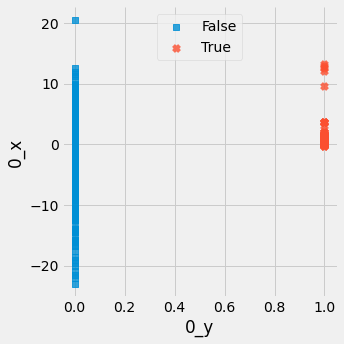

In [56]:
# melakukan visualisasi data
markers = ['s', 'x']
colors = ['r', 'b']
sns.lmplot(x='0_y', y='0_x', data=dat, markers=markers,fit_reg=False, hue='0_y', legend=False)
plt.legend(loc='upper center')
plt.show()

### kesimpulan
 - video yang  mengalami trending adalah video yang mengaktifkan komentar
 - pengguna youtube kebanyakan hanya menonto video saya  tanpa meninggalkan komentar dan likenya
 - views terbanyak berbanding lurus dengan comentar terbanyak dan views terbanyak
 - video trending terbanyak terjadi pada tahun 2018 bulan 5
 - 
